## Assignment 1 - Part 1


In [0]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
#Importing datasets from google drive 
from google.colab import drive 
drive.mount('/content/gdrive')

In [0]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/stackOverflow.csv')

In [23]:
df.head()

,Unnamed: 0,qid,i,qs,qt,tags,qvc,qac,aid,j,as,at
0,1,563355,62701.0,0,1235000081,"php,error,gd,image-processing",220,2,563372,67183.0,2,1235000501
1,2,563355,62701.0,0,1235000081,"php,error,gd,image-processing",220,2,563374,66554.0,0,1235000551
2,3,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563358,15842.0,3,1235000177
3,4,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563413,893.0,18,1235001545
4,5,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563454,11649.0,4,1235002457


In [24]:
df.columns

Index([u'Unnamed: 0', u'qid', u'i', u'qs', u'qt', u'tags', u'qvc', u'qac',
       u'aid', u'j', u'as', u'at'],
      dtype='object')

The following tags are represented as 

**qid** : question_id
**i** : userID_q
**qs** : score_q
**qt** : time_q
**tags** : tags
**qvc** : views_q
**qac** : answers
**aid** : answer_id
**j** : userID_a
**as** : score_a
**at** : time_a 

In [0]:
del df['Unnamed: 0']

In [0]:
df.columns = ['question_id', 'userID_q', 'score_q', 'time_q', 'tags', 'views_q', 'answers', 'answer_id', 'userID_a', 'score_a', 'time_a']

In [27]:
df.head()

,question_id,userID_q,score_q,time_q,tags,views_q,answers,answer_id,userID_a,score_a,time_a
0,563355,62701.0,0,1235000081,"php,error,gd,image-processing",220,2,563372,67183.0,2,1235000501
1,563355,62701.0,0,1235000081,"php,error,gd,image-processing",220,2,563374,66554.0,0,1235000551
2,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563358,15842.0,3,1235000177
3,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563413,893.0,18,1235001545
4,563356,15842.0,10,1235000140,"lisp,scheme,subjective,clojure",1047,16,563454,11649.0,4,1235002457


## **1. Number of questions asked with respect to the given Tags.**

In [0]:
tag_list = df["tags"].unique().tolist()

In [0]:
tag_len = df['tags'].apply(lambda x: x.split(','))

In [33]:
len(tag_len[0])

4

In [0]:
from collections import Counter

In [0]:
total_tag = []
for tag in tag_len:
  total_tag.append(len(tag))
total_tag = Counter(total_tag)


In [38]:
total_tag

Counter({1: 24332, 2: 63304, 3: 79577, 4: 56678, 5: 39649})

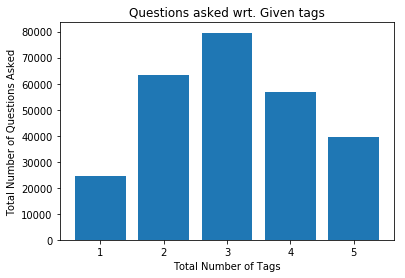

In [43]:
plt.bar(list(total_tag.keys()), list(total_tag.values()))
plt.xlabel('Total Number of Tags')
plt.ylabel('Total Number of Questions Asked')
plt.title('Questions asked wrt. Given tags')
plt.show()

As we can see most of the questions asked which are having 3 tags and then 2 tags and then others.

## 2. Most commonly used tags

In [0]:
tags = list(df['tags'].unique())
tags_list = []
for tag in tags:
    tags_list += tag.split(',')
tags_list

In [68]:
tags_list = Counter(tags_list)
tags = pd.DataFrame()
tags['tag'] = list(tags_list.keys())
tags['freq'] = list(tags_list.values())
tags

,tag,freq
0,fdcc,1
1,xgettext,4
2,screen-resolution,4
3,htmlagilitypack,6
4,opengl,214
5,legacy-code,16
6,aegis,1
7,ejb,35
8,dubious-intent,1
9,hanging,3


In [0]:
tags = tags.sort_values(by='freq', ascending=False)

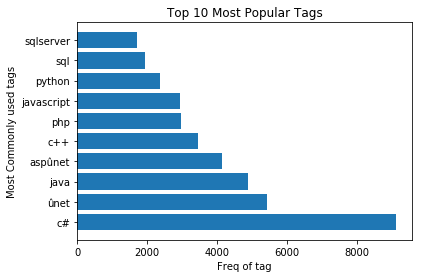

In [74]:
#plotting horizontal bar
plt.barh(list(tags['tag'])[:10], list(tags['freq'])[:10])
plt.ylabel('Most Commonly used tags')
plt.xlabel('Freq of tag')
plt.title('Top 10 Most Popular Tags')
plt.show()

From the above bar graph we can say that C# is the most commonly used tag.

### Trend of in Data Science Tags 

Common tags used in Data science are "python" , "r", "excel", "matlab"

In [0]:
data_science_tags = ['python', 'r', 'excel', 'matlab']
xaxis,yaxis = [], []
for tag in data_science_tags:
    i = list(tags['tag']).index(tag)
    xaxis.append(tag)
    yaxis.append(list(tags['freq'])[i])

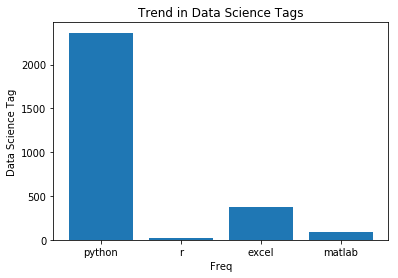

In [76]:
plt.bar(xaxis, yaxis)
plt.ylabel('Data Science Tag')
plt.xlabel('Freq')
plt.title('Trend in Data Science Tags')
plt.show()

So, python is the most common tag in Data science.

## 3. The average time is taken to answer a question.

In [78]:
time_taken = df[['time_q', 'time_a']]
time_taken.head()

,time_q,time_a
0,1235000081,1235000501
1,1235000081,1235000551
2,1235000140,1235000177
3,1235000140,1235001545
4,1235000140,1235002457


In [79]:
time_taken['avg'] = abs(time_taken['time_a'] - time_taken['time_q'])
time_taken.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,time_q,time_a,avg
0,1235000081,1235000501,420
1,1235000081,1235000551,470
2,1235000140,1235000177,37
3,1235000140,1235001545,1405
4,1235000140,1235002457,2317


In [82]:
print "Average Time Taken to Answer a Question in seconds: ", np.average(time_taken['avg'])

Average Time Taken to Answer a Question in seconds:  133799.71295059574


## 4.Numbers of views related to the number of Answers.

In [84]:
views = df[['views_q', 'answers']].drop_duplicates()
views.reset_index(drop=True)
views.head()

,views_q,answers
0,220,2
2,1047,16
18,108,3
21,179,1
22,247,2


In [85]:

views.describe()

,views_q,answers
count,6956.000000,6956.000000
mean,450.220529,7.387435
std,630.022015,7.103273
min,3.000000,1.000000
25%,207.750000,3.000000
50%,353.500000,6.000000
75%,534.000000,10.000000
max,19378.000000,176.000000


From the following table we can say that 

One queston took minimum of 3 views to obtain 1 answer

25% of question took 207 views to obtain 3 answer.

Similarily for other 50% and 75%

And a maximum one question took 19378 views to obtain 176 answers.

## 5. Tags get highest/lowest rating in Questions.

In [103]:
tag_rating = df[['tags', 'score_q']].drop_duplicates()
tag_rating.reset_index(drop=True)
tag_rating.head()

,tags,score_q
0,"php,error,gd,image-processing",0
2,"lisp,scheme,subjective,clojure",10
18,"cocoa-touch,objective-c,design-patterns",0
21,core-animation,0
22,"django,django-models",0


In [107]:
highest_rating = df.loc[df['score_q'].idxmax()]
highest_rating

question_id                                    784461
userID_q                                        72162
score_q                                           203
time_q                                     1240545634
tags           subjective,best-practices,productivity
views_q                                          7049
answers                                           102
answer_id                                      784465
userID_a                                         4249
score_a                                            22
time_a                                     1240545754
Name: 150035, dtype: object

### Highest rating in Question -- (question_id -- subjective,best-practices,productivity)
### Highest rating in Answer -- (answers -- 102)

In [109]:
lowest_rating = df.loc[df['score_q'].idxmin()]
lowest_rating

question_id                         566010
userID_q                             43371
score_q                                -32
time_q                          1235059661
tags           microsoft,theory,subjective
views_q                                384
answers                                  3
answer_id                           566020
userID_a                              8435
score_a                                  7
time_a                          1235059817
Name: 1828, dtype: object

### Lowest rating in Question -- (question_id -- microsoft,theory,subjective)
### Lowest rating in Answer -- (answers -- 3)

## 6. Most Active/Inactive in answering the questions.

In [133]:
tag_rating = df[['tags', 'time_q', 'time_a']].drop_duplicates().reset_index(drop=True)
tag_rating['diff'] = abs(tag_rating['time_q'] - tag_rating['time_a'])
tag_rating.head()

,tags,time_q,time_a,diff
0,"php,error,gd,image-processing",1235000081,1235000501,420
1,"php,error,gd,image-processing",1235000081,1235000551,470
2,"lisp,scheme,subjective,clojure",1235000140,1235000177,37
3,"lisp,scheme,subjective,clojure",1235000140,1235001545,1405
4,"lisp,scheme,subjective,clojure",1235000140,1235002457,2317


In [134]:
from tqdm import tqdm_notebook
Rate = {}
for i in tqdm_notebook(range(len(tag_rating['tags']))):
    for tag in tag_rating['tags'][i].split(','):
        try:
            Rate[tag].append(tag_rating['diff'][i])
        except Exception:
            Rate[tag] = [tag_rating['diff'][i]]

In [0]:
tag_rateAvg = {}
for key in list(Rate.keys()):
    tag_rateAvg[key] = np.average(Rate[key])

In [0]:
tag_rateAvg = pd.DataFrame([list(tag_rateAvg.keys()), list(tag_rateAvg.values())])
tag_rateAvg = tag_rateAvg.transpose()
tag_rateAvg.columns = ['tags', 'diff']
tag_rateAvg = tag_rateAvg.sort_values('diff')

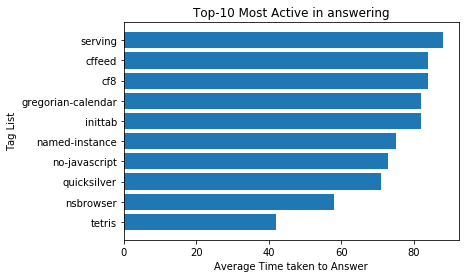

In [137]:
plt.barh(list(tag_rateAvg['tags'])[:10], list(tag_rateAvg['diff'])[:10])
plt.xlabel('Average Time taken to Answer')
plt.ylabel('Tag List')
plt.title('Top-10 Most Active in answering')
plt.show()

Text(0.5,1,'Top-10 Most Inactive')

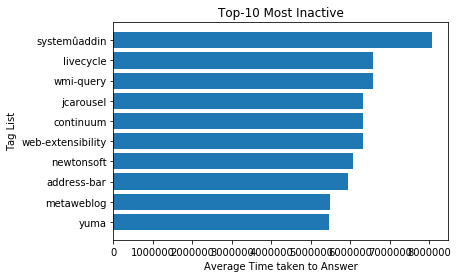

In [138]:

plt.barh(list(tag_rateAvg['tags'])[-10:], list(tag_rateAvg['diff'])[-10:])
plt.xlabel('Average Time taken to Answer')
plt.ylabel('Tag List')
plt.title('Top-10 Most Inactive')

## 8. Which tags draws the highest/lowest views?

In [141]:

tag_views = df[['tags', 'views_q']].drop_duplicates().reset_index(drop=True)
tag_views.head()

,tags,views_q
0,"php,error,gd,image-processing",220
1,"lisp,scheme,subjective,clojure",1047
2,"cocoa-touch,objective-c,design-patterns",108
3,core-animation,179
4,"django,django-models",247


In [142]:
View = {}
for i in tqdm_notebook(range(len(tag_views['tags']))):
    for tag in tag_views['tags'][i].split(','):
        try:
            View[tag].append(tag_views['views_q'][i])
        except Exception:
            View[tag] = [tag_views['views_q'][i]]

In [0]:
tag_viewAvg = {}
for key in list(View.keys()):
    tag_viewAvg[key] = np.average(View[key])

In [0]:
tag_viewAvg = pd.DataFrame([list(tag_viewAvg.keys()), list(tag_viewAvg.values())])
tag_viewAvg = tag_viewAvg.transpose()
tag_viewAvg.columns = ['tags', 'views']
tag_viewAvg = tag_viewAvg.sort_values('views')

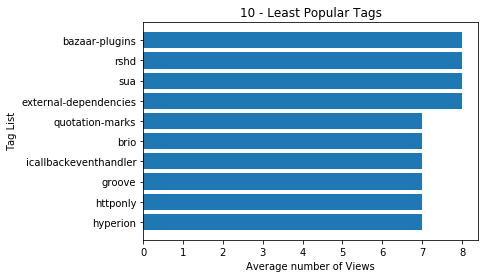

In [145]:
plt.barh(list(tag_viewAvg['tags'])[:10], list(tag_viewAvg['views'])[:10])
plt.xlabel('Average number of Views')
plt.ylabel('Tag List')
plt.title('10 - Least Popular Tags')
plt.show()

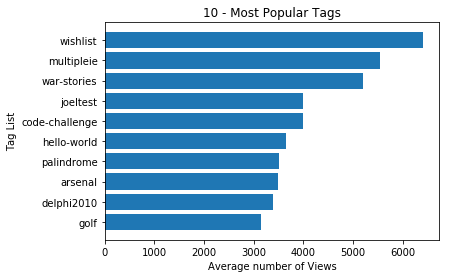

In [146]:
plt.barh(list(tag_viewAvg['tags'])[-10:], list(tag_viewAvg['views'])[-10:])
plt.xlabel('Average number of Views')
plt.ylabel('Tag List')
plt.title('10 - Most Popular Tags')
plt.show()